<a href="https://colab.research.google.com/github/MikeRuz551/PythonDA/blob/main/01_Symbolic_mathematics_with_Sympy_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Символьная математика с Sympy

[Sympy](http://www.sympy.org/en/index.html) описывается как:

> "... Python library for symbolic mathematics."

Это означает, что `Sympy` можно использовать для:

- Работа с символическими выражениями;
- Решать символьные уравнения;
- Проводить символическое исчисление;
- Построение символьной графики.

Подробнее о возможностях `Sympy` можно прочитать здесь: http://www.sympy.org/en/index.html.

## Работа с символическими выражениями

Импортируем библиотеку `Sympy`.

In [2]:
import sympy as sym

Импорт библиотеки дает доступ к ее командам, используя сокращение `sym`.

При  попытке проверки выражения $x - x = 0$, получим ошибку, если предварительно не описать в Python переменную $x$.

Здесь на помощь приходит `Sympy`: мы можем указать Python создать $x$ в качестве символьной переменной:

In [3]:
x = sym.symbols('x')

Теперь мы можем вычислить $x - x$:

In [4]:
x - x

0

Мы можем создавать выражения и манипулировать ими в Sympy. Давайте, например, проверим:

$$(a + b) ^ 2 = а ^ 2 + 2ab + b ^2$$

Сначала мы создаем символьные переменные $a, b$:

In [6]:
a, b = sym.symbols('a, b')

Теперь давайте создадим наше выражение:

In [7]:
expr = (a + b) ** 2
expr

(a + b)**2

**Примечание**  в `Sympy` можно использовать LaTeX-разметку, чтобы результат выглядел в более удобно читаемом виде:

In [8]:
sym.init_printing()

In [14]:
expr

       2
(a + b) 

Раскроем скобки в выражении:

In [13]:
expr.expand()

 2            2
a  + 2⋅a⋅b + b 

Обратите внимание, что  в `Sympy` можно создать код LaTeX для дальнейшего применения:

In [12]:
sym.latex(expr.expand())

'a^{2} + 2 a b + b^{2}'

---
**УПРАЖНЕНИЕ 1** Используйте Sympy, чтобы проверить следующие выражения:

- $(a - b) ^ 2 = a ^ 2 - 2 a b + b^2$
- $a ^ 2 - b ^ 2 = (a - b) (a + b)$ (вместо использования `expand` попробуйте `factor`)

In [33]:
a, b = sym.symbols('a b')

expr = (a - b) ** 2
expr.expand()

 2            2
a  - 2⋅a⋅b + b 

In [32]:
expr3 = a ** 2 - b ** 2
expr3.factor()

(a - b)⋅(a + b)

## Решение символьных уравнений

Мы можем использовать `Sympy` для решения символьных выражений. Например, найдем неизвестное $x$ квадратного уравнения:
$$a x ^ 2 + b x + c = 0$$

In [23]:
a, b, c, x = sym.symbols('a, b, c, x')

Команда в `Sympy` для решения уравнений — `solveset`. Первый аргумент — это выражение, для которого будет найден корень. Второй аргумент — это значение, которое мы ищем.

In [24]:
sym.solveset(a * x ** 2 + b * x + c, x)

⎧           _____________             _____________⎫
⎪          ╱           2             ╱           2 ⎪
⎨   b    ╲╱  -4⋅a⋅c + b       b    ╲╱  -4⋅a⋅c + b  ⎬
⎪- ─── - ────────────────, - ─── + ────────────────⎪
⎩  2⋅a         2⋅a           2⋅a         2⋅a       ⎭

---
** УПРАЖНЕНИЕ 2** Используйте Sympy, чтобы найти решения обобщенного кубического уравнения:

$$a x ^ 3 + b x ^ 2 + c  x + d = 0$$

---

In [77]:
a, b, c, x, d = sym.symbols('a, b, c, x, d')
sym.solveset(a * x ** 3 + b *x**2 + c*x+d,x)

⎧                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                 2                           
⎪                                          3⋅c   b                            
⎪                                        - ─── + ──                           
⎪                                           a     2                           
⎪                                                a                            
⎨- ───────────────────────────────────────────────────────────────────────────
⎪               ____________________________________

В `solveset` можно передать больше аргументов, например, чтобы ограничить пространство решений. Давайте посмотрим, что представляет собой решение следующей задачи. $\mathbb{R}$:

$$x^2=-1$$

In [36]:
sym.solveset(x ** 2 + 1, x, domain=sym.S.Reals)

∅

---
** УПРАЖНЕНИЕ 3** Используйте Sympy, чтобы найти решения следующих уравнений:

- $x ^ 2 == 2$ in $\mathbb{N}$;
- $x ^ 3 + 2 x = 0$ in $\mathbb{R}$.

---

In [44]:
x = sym.symbols('x')
sym.solveset(x ** 2 - 2, x, domain=sym.S.Naturals)

x = sym.symbols('x')
sym.solveset(x ** 3 + 2 * x, x, domain=sym.S.Reals)

{0}

## Символьное исчисление

`Sympy` также используют для вычисления пределов. Давайте посчитаем:

$$\lim_{x\to 0^+}\frac{1}{x}$$

In [45]:
sym.limit(1/x, x, 0, dir="+")

∞

---
**УПРАЖНЕНИЕ 4** Рассчитайте следующие пределы:

1. $\lim_{x\to 0^-}\frac{1}{x}$
2.  $\lim_{x\to 0}\frac{1}{x^2}$

---

In [50]:
sym.limit(1/x, x, 0, dir="+")

∞

Можно использовать `Sympy` для дифференцирования и интегрирования.Продифференцируем следующее выражения:


$$x ^ 2 - \cos(x)$$

In [61]:
sym.diff(x ** 2 - sym.cos(x), x)

2⋅x + sin(x)

Аналогично можно интегрировать:

In [62]:
sym.integrate(x ** 2 - sym.cos(x), x)

 3         
x          
── - sin(x)
3          

Включена возможность расчета определенных интегралов:

In [ ]:
sym.integrate(x ** 2 - sym.cos(x), (x, 0, 5))

---

**УПРАЖНЕНИЕ 5** Используйте Sympy, чтобы рассчитать следующие выражения:

1. $\frac{d\sin(x ^2)}{dx}$
2. $\frac{d(x ^2 + xy - \ln(y))}{dy}$
3. $\int e^x \cos(x)\;dx$
4. $\int_0^5 e^{2x}\;dx$

In [70]:
sym.integrate(sym.exp(x) * sym.cos(x), x)
sym.integrate(sym.exp(2*x), (x, 0, 5))

       10
  1   ℯ  
- ─ + ───
  2    2 

## Построение графика с помощью Sympy

Наконец, `Sympy` можно использовать для построения графиков функций. Обратите внимание, что здесь используется другая библиотека Python под названием [matplotlib](http://matplotlib.org/). Хотя `Sympy` позволяет  не использовать `matplotlib`` напрямую, порой, требуется пользоваться данной библиотекой для более детального построения.

Прежде чем рисовать графики в `Jupyter`, требуется запустить команду, чтобы он отображал графики прямо в блокноте:

In [63]:
%matplotlib inline

Let us plot $x^2$:

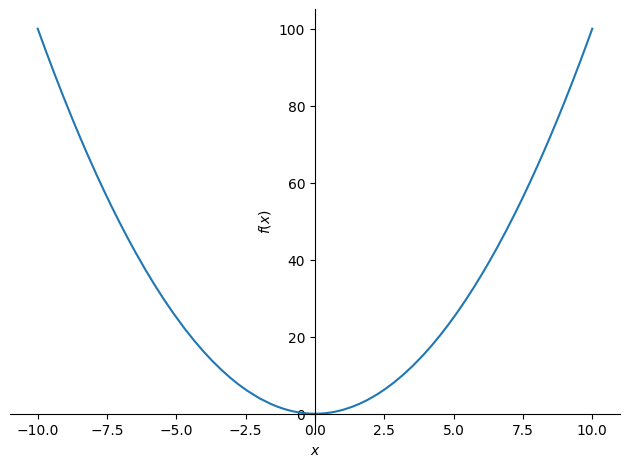

In [64]:
expr = x ** 2
p = sym.plot(expr);

Можно напрямую сохранить этот график в файл:

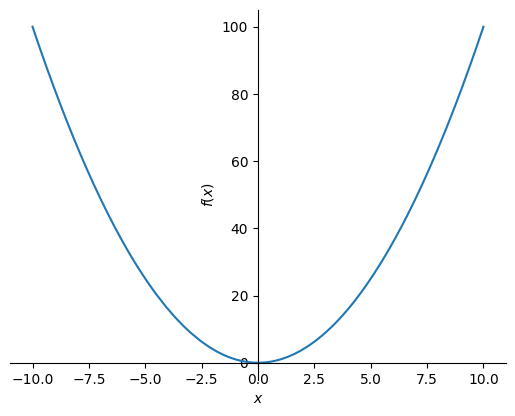

In [53]:
p.save("x_squared.pdf");

---
**УПРАЖНЕНИЕ 6** Постройте графики следующих функций:

- $y=x + cos(x)$
- $y=x ^ 2 - e^x$ (вам может пригодиться `ylim` в качестве аргумента)

Поэкспериментируйте с сохранением графиков в файл..

In [ ]:
expr=x+sym.cos(x)
p=sym.plot(expr)

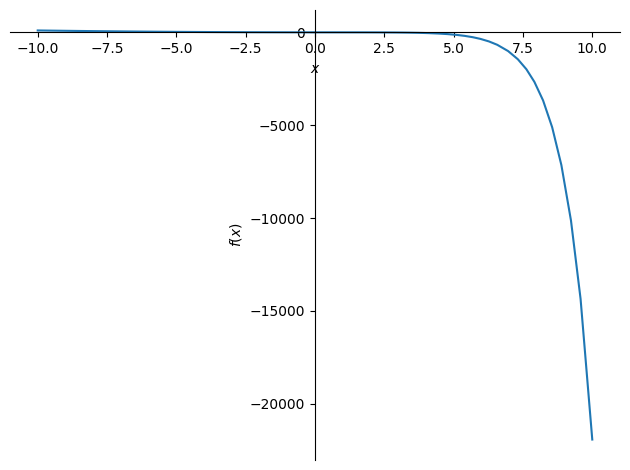

In [74]:
expr=x**2-sym.exp(x)
p=sym.plot(expr)